In [80]:
'''
Trabalho 4: Classificação - k-Nearest Neighbour (kNN)

Neste trabalho estamos criando um classificador k-Nearest Neighbour, um dos classificadores mais simples. A tarefa a ser realizada é a seguinte:

Dado um conjunto de dados, você quer construir um programa que prevê novos exemplos para uma classe.
Por exemplo, dado um conjunto de dígitos escritos à mão, você quer construir um programa que reconhece automaticamente o CEP das cartas.

Implemente um classificador 1-NN usando a distância Euclidiana.

Note que todos os conjuntos de dados usam vetores de linha. A função deve ser algo parecido com:

def meuKnn(dadosTrain, rotuloTrain, dadosTeste, k)
  %Para cada exemplo de teste
  % Calcule a distância entre o exemplo de teste e os dados de treinamento
  % Ordene as distâncias. A ordem iX de cada elemento ordenado é importante:
  % [distOrdenada ind] = sort(...);
  % O rótulo previsto corresponde ao rótulo do exemplo mais próximo (iX(1))
'''

import numpy as np
import pandas as pd
import scipy.io as scipy
from scipy.stats import mode
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import random

# primeiro cálculo (distância euclidiana)
def calcular_distancias(ponto_exemplo, dadosTrain):
    distancias = []
    # calcular todas as distâncias entre o exemplo e os dados de treinamento
    for ponto_treino in dadosTrain:
        diff = ponto_treino - ponto_exemplo
        squared_diff = diff**2
        sum_squared_diff = np.sum(squared_diff)
        distancia = np.sqrt(sum_squared_diff)
        distancias.append(distancia)
    return np.array(distancias)

# dadosTrain -> matriz de dados de treinamento
# dadosTeste -> matriz de dados de teste
# rotuloTrain -> vetor de rótulos de treinamento
def meuKnn(dadosTrain, rotuloTrain, dadosTeste, k):
    num_testes = dadosTeste.shape[0]

    rotuloPrevisto = np.zeros(num_testes, dtype=rotuloTrain.dtype)

    # para cada exemplo de teste
    for i in range(num_testes):
        # calcular a distância do novo exemplo a todos os exemplos de treino
        distancias = calcular_distancias(dadosTeste[i, :], dadosTrain)

        # ordene as distâncias e obtenha os índices ordenados
        distOrdenada = np.sort(distancias)
        # argsort retorna os indices que ordenariam o array de distancias
        indices_ordenados = np.argsort(distancias)

        # seleciona os k vizinhos mais próximos
        k_indices = indices_ordenados[:k]
        # dentre os rótulos pegue o rótulo de cada k vizinho
        k_rotulos = rotuloTrain[k_indices]

        # calcula a moda dos rótulos presentes no array k_rotulos e pega o primeir valor
        rotuloPrevisto[i] = mode(k_rotulos)[0]

    return rotuloPrevisto



In [81]:
''' Para testar se você implementou a função corretamente, baixe o arquivo grupoDados1.mat - cada arquivo .mat contém 4 variáveis que são: grupoTest,
grupoTrain, testRots, trainRots. Para baixar os arquivos .mat no Python você pode fazer o seguinte:
'''

mat = scipy.loadmat('grupoDados1.mat')

# contém os dados para treinar o modelo
grupoTrain = mat['grupoTrain']
# contém os rótulos -> classes/categorias que cada amostra pertence (exemplo: se classificarmos imagens de cães e gatos, os rótulos podem ser "cão" "gato")
trainRots = mat['trainRots'].flatten()
# dados de teste -> será usado para avaliar capacidade do modelo
grupoTest = mat['grupoTest']
# rótulos dos dados de teste
testRots = mat['testRots'].flatten()

In [82]:
def calcular_acuracia(rotuloPrevisto, testRots):
    # vai comparar os rótulos previstos do modelo com os rótulos reais das amostras de teste
    # comparação resulta em uma matriz de booleanos
    matriz_booleanos = rotuloPrevisto == testRots
    # soma todos os "trues" na matriz de booleanos (cada true é 1), ou seja, quantas previsões ele fez corretas
    resultados_verdadeiros = np.sum(matriz_booleanos)
    # quantidade de amostras de teste, usar para verificar o desempenho do modelo em relação a todo conjunto de teste
    totalNum = len(testRots)
    acuracia = resultados_verdadeiros / totalNum
    return acuracia

In [83]:
'''
Então, verifique quantas classes foram previstas corretamente, isto é chamado de acurácia (accuracy):
'''
rotuloPrevisto_k1 = meuKnn(grupoTrain, trainRots, grupoTest, 1)
acuracia_k1 = calcular_acuracia(rotuloPrevisto_k1, testRots)
print(f'acurácia k=1: {acuracia_k1 * 100:.2f}%')


acurácia k=1: 96.00%


In [84]:
'''
A acurácia deve ser de 96%. Agora, vamos estender a função a um classificador k-NN:

def meuKnn(dadosTrain, rotuloTrain, dadosTeste, k)
  %Para cada exemplo de teste
  % Calcule a distância entre o exemplo de teste e os dados de treinamento
  % Ordene as distâncias. A ordem iX de cada elemento ordenado é importante:
  % [distOrdenada ind] = sort(...);
  % Obter os rótulos correspondentes aos exemplos mais próximos k
  % Agora, a moda dos rótulos correspondentes são os rótulos previstos (você pode usar a função mode).


Teste novamente no conjunto de dados 1 (grupoDados1.mat) e utilize k = 10 para uma acurácia igual a 94%.
'''
rotuloPrevisto_k10 = meuKnn(grupoTrain, trainRots, grupoTest, 10)
acuracia_k10 = calcular_acuracia(rotuloPrevisto_k10, testRots)
print(f'acurácia k=10: {acuracia_k10 * 100:.2f}%')

acurácia k=10: 94.00%


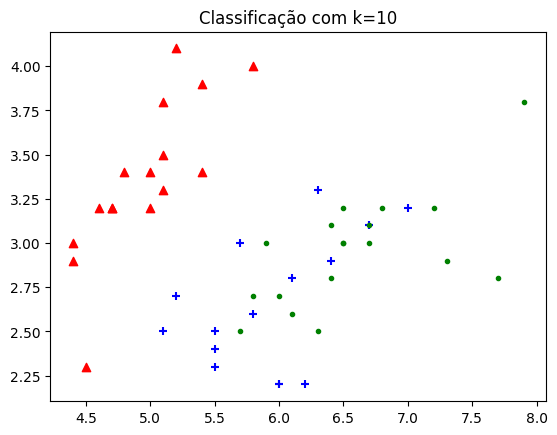

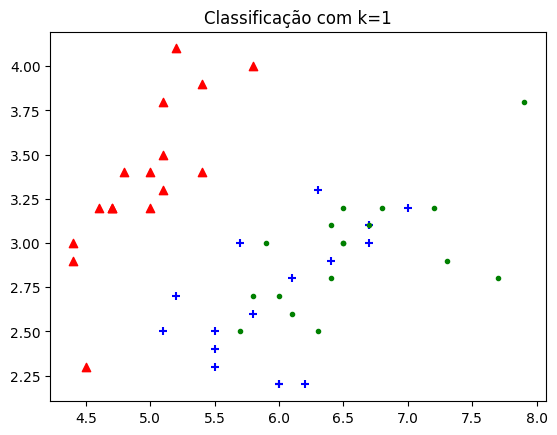

In [85]:
'''
É sempre bom visualizar graficamente seus dados. Para fazer isso, crie a seguinte função:
'''

def getDadosRotulo(dados, rotulos, rotulo, indice):
  ret = []
  for idx in range(0, len(dados)):
      if (rotulos[idx] == rotulo):
          ret.append(dados[idx][indice])
  return ret

''' Nesta função, d1 e d2 denotam as dimensões que você deseja visualizar, isto é 1 e 2 respectivamente. '''
def visualizaPontos(dados, rotulos, d1, d2):
  fig, ax = plt.subplots()
  ax.scatter(getDadosRotulo(dados, rotulos, 1, d1), getDadosRotulo(dados, rotulos, 1, d2), c='red' , marker='^')
  ax.scatter(getDadosRotulo(dados, rotulos, 2, d1), getDadosRotulo(dados, rotulos, 2, d2), c='blue' , marker='+')
  ax.scatter(getDadosRotulo(dados, rotulos, 3, d1), getDadosRotulo(dados, rotulos, 3, d2), c='green', marker='.')


visualizaPontos(grupoTest, rotuloPrevisto_k10, 0, 1)
plt.title('Classificação com k=10')
visualizaPontos(grupoTest, rotuloPrevisto_k1, 0, 1)
plt.title('Classificação com k=1')
plt.show()

In [87]:
'''
O grupoDados1 é um conjunto de dados de flores. Para mais informações consulte: http://archive.ics.uci.edu/ml/datasets/Iris .

Q1.1. Qual é a acurácia máxima que você consegue da classificação?
Q1.2. É necessário ter todas as características (atributos) para obter a acurácia máxima para esta classificação?
'''

def dividir_conjuntos(X, y, proporcao_teste=0.1):
    num_exemplos = len(X)
    num_teste = int(proporcao_teste * num_exemplos)

    indices = list(range(num_exemplos))
    random.shuffle(indices)

    indices_teste, indices_treinamento = indices[:num_teste], indices[num_teste:]

    X_treinamento, X_teste = X[indices_treinamento], X[indices_teste]
    y_treinamento, y_teste = y[indices_treinamento], y[indices_teste]

    return X_treinamento, X_teste, y_treinamento, y_teste

iris_data = pd.read_csv('iris.data', header=None)

# todas as colunas exceto a última
X = iris_data.iloc[:, :-1].values
y = iris_data.iloc[:, -1].values # última coluna (rótulos)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# dividir os dados em conjuntos de treinamento e teste
X_treinamento, X_teste, y_treinamento, y_teste = dividir_conjuntos(X, y)

# Usar k=3
k = 3
rotuloPrevisto_k3 = meuKnn(X_treinamento, y_treinamento, X_teste, k)
acuracia_k3 = calcular_acuracia(y_teste, rotuloPrevisto_k3)

print(f'Acurácia com k={k}: {acuracia_k1 * 100:.2f}%')

'''
Q1.1.
a acurácia máxima teórica que poderia alcançar com os dados do conjunto Iris é de 100%.
Na prática, a acurácia depende do valor de k e da divisão aleatória dos dados.
por exemplo, com k=1, a acurácia pode variar devido à sensibilidade aos vizinhos mais próximos.

Q1.2. não necessariamente, pois pode haver redundância; no k-NN, algumas características podem fornecer informações duplicadas.
Por exemplo, duas características altamente correlacionadas podem não adicionar novas informações significativas. Remover uma delas pode simplificar sem reduzir a acurácia.
Também há a rrelevância já que algumas características podem não ser úteis para a classificação e podem até introduzir ruído, reduzindo a precisão.
'''

Acurácia com k=3: 96.00%


'\nQ1.1. \na acurácia máxima teórica que poderia alcançar com os dados do conjunto Iris é de 100%. \nNa prática, a acurácia depende do valor de k e da divisão aleatória dos dados.\npor exemplo, com k=1, a acurácia pode variar devido à sensibilidade aos vizinhos mais próximos.\n\nQ1.2. não necessariamente, pois pode haver redundância; no k-NN, algumas características podem fornecer informações duplicadas. \nPor exemplo, duas características altamente correlacionadas podem não adicionar novas informações significativas. Remover uma delas pode simplificar sem reduzir a acurácia.\nTambém há a rrelevância já que algumas características podem não ser úteis para a classificação e podem até introduzir ruído, reduzindo a precisão.\n'